# CSCI 3352 Biological Networks, Spring 2020, Prof. Clauset
Submit here: https://moodle.cs.colorado.edu/course/view.php?id=1273

# Problem Set 1 : Fundamentals of Networks

***

**Name**: Julia Sanford

**Worked with**: Denver Chernin

***

This assignment is due on Moodle by **11:55pm on Thursday, January 23rd**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 88 points total, and 15 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Moodle.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)
* [Tutorial for networkx](https://networkx.github.io/documentation/stable/tutorial.html)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [20]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Network warmup (33 pts total)

This problem gives you with practice performing basic operations on network data, using the `networkx` library. In order to answer these questions, you will need to search through the `networkx` online documentation to find appropriate functions. Some solutions will require you to write a little bit of your own code to process the input or output of those functions.

***
### Problem 1-A (5 pts)

Using `networkx`, load the assigned network data file as a simple graph, and then report the following:
* number of nodes $n$
* number of edges $m$
* mean degree $\langle k \rangle$

There are 3 network files provided. Enter your birthday in the format MMYY (drop leading 0) as `seed` and then work with the file the code snippet below tells you is yours.

In [21]:
import random
seed = 1097 # your MMYY birthday here

##### do not modify below here #####
random.seed(seed)
roll_the_dice = random.randint(1, 3)
if roll_the_dice == 1:
    print(f'Lucky you! Your file is karate.gml')
elif roll_the_dice == 2:
    print(f'Fantastic! Your file is grass_web.gml')
else:
    print(f'Exciting! Your file is yeast_spliceosome.gml')
##### do not modify above here #####

Exciting! Your file is yeast_spliceosome.gml


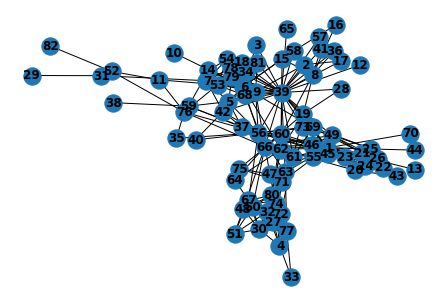

number of nodes, n  = 82
number of edges, m  = 291
mean degree,    <k> =  7.10


In [22]:
# Your code here
g = nx.read_gml("yeast_spliceosome.gml") # read from file
nx.draw(g, with_labels=True, font_weight='bold') # set up the graph with nodes labeled with indices
plt.show() # show the graph

# grab number of nodes and edges
n = nx.number_of_nodes(g)
m = nx.number_of_edges(g)

# go through the degrees of each node, sum them, and average them
total = 0
for i in nx.degree(g):
    total = total + i[1]
kmean = total / n

##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)

***
### Problem 1-B (6 pts)

Use the drawing functions in `networkx` to visualize your network in 3 ways:
* `spring` layout
* `circular` layout
* `random` layout

Use the function `plt.show()` to show the layout itself, once you've built it using `networkx`.

Then, write a few sentences comparing the layouts. Briefly explain what, if anything, does each show well or not well.

Spring Layout


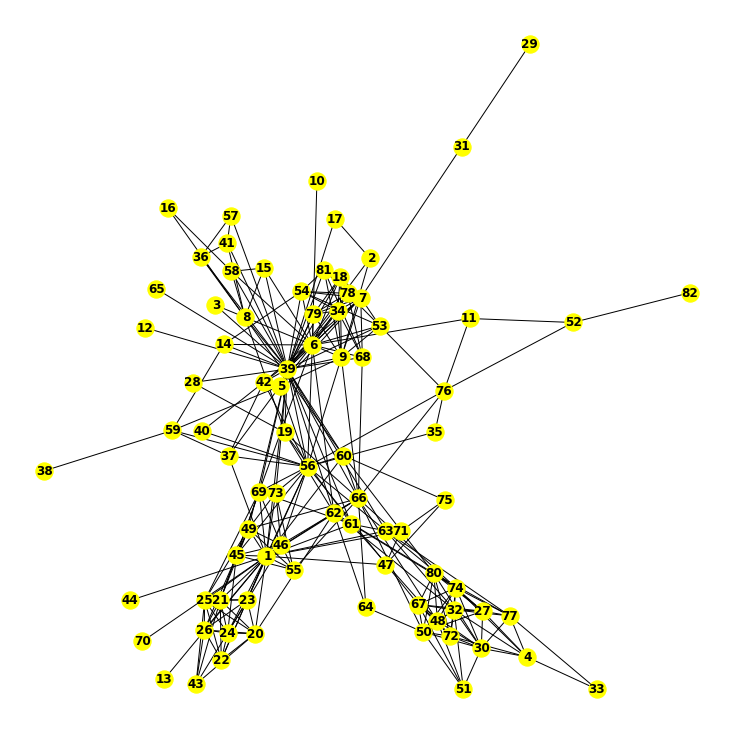

Circular Layout


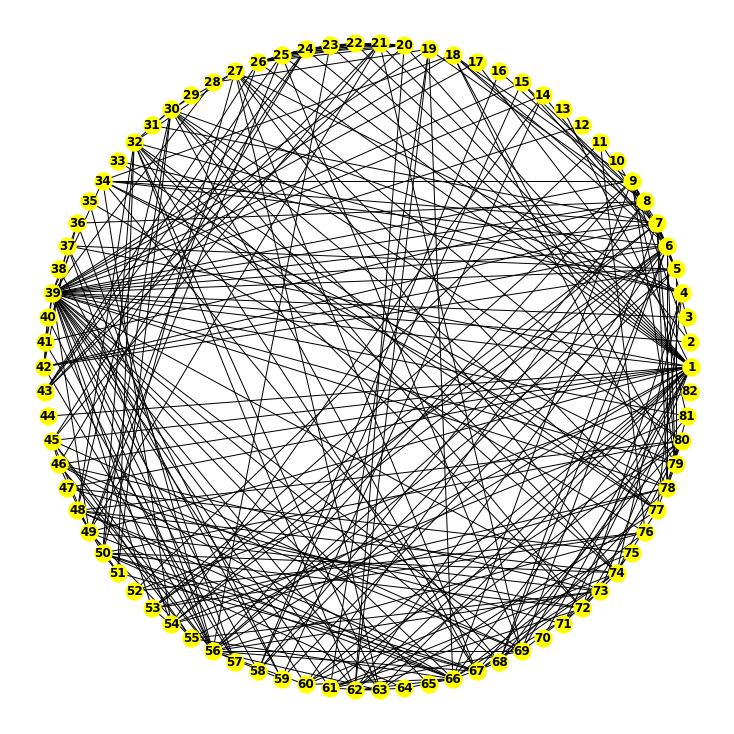

Random Layout


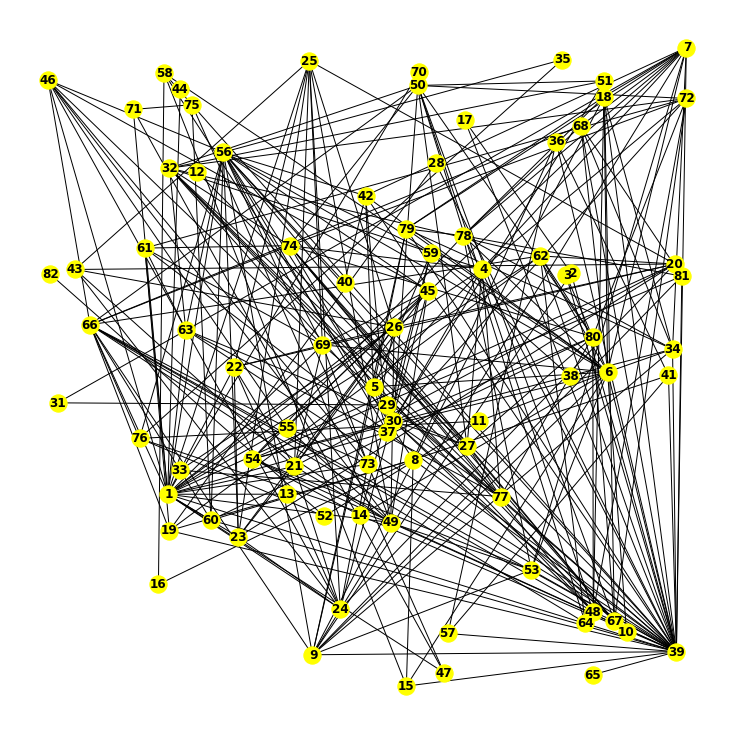

In [23]:
# Your code here

print("Spring Layout")
plt.figure(figsize=(10,10)) # set the figure size to be a square
nx.draw_spring(g, with_labels=True, font_weight='bold', node_color='yellow') # set up the networkx graph with specific option
plt.show() # show the graph made before with nice display

# Repeated for next 2 graphs with different layouts

print("Circular Layout")
plt.figure(figsize=(10,10))
nx.draw_circular(g, with_labels=True, font_weight='bold', node_color='yellow')
plt.show()

print("Random Layout")
plt.figure(figsize=(10,10))
nx.draw_random(g, with_labels=True, font_weight='bold', node_color='yellow')
plt.show()

The Spring layout puts the nodes closer to other nodes that it connects to which makes it easier to see the edges. This is helpful because it allows you to see nodes that may relate to each other in groups because they are closer in proximity.

The Circular layout places all of the nodes on the edges. This allows you to clearly see the nodes and observe the density of the network.

The Random layout is not very helpful becuase there are many crossed edges and the nodes are placed randomly regardless of its edges. This makes it difficult to read and does not give us any extra useful information about the nodes or edges.

***
### Problem 1-C (14 pts)

Using `networkx` functions, and any additional code you need to write, calculate and report the following network summary statistics:
* diameter $\ell_\max$
* mean geodesic path length $\langle \ell \rangle$
* clustering coefficient $C$ (aka, transitivity)
* number of connected components $h$
* maximum degree $k_{\rm max}$
* standard deviation of the degrees $\sigma_{k}$

Hint: the first four of these can be calculated using built-in functions from `networkx`; for the last two, you'll need to use the `.degrees(G)` function to obtain a dictionary of the degrees, and the process it yourself.

In [24]:
# Your code here

# built in functions
diameter = nx.diameter(g)
ellmean = nx.average_shortest_path_length(g)
C = nx.average_clustering(g)
h = nx.number_connected_components(g)

# create list of all nodes' degrees
degrees = [i[1] for i in nx.degree(g)]

# get the max of all the degrees
kmax = max(degrees)

# get the standard deviation of all the degrees
kstd = np.std(degrees)

##### do not modify below here #####
print(f'diameter = {diameter}')
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'number of components,   h     =  {h}')
print(f'max degree, k_max = {kmax}')
print(f'max degree, k_std = %5.2f' % kstd)

diameter = 6
mean geodesic distance, <ell> =  2.67
clustering coefficient, C     =  0.54
number of components,   h     =  1
max degree, k_max = 37
max degree, k_std =  5.68


***
### Problem 1-E (8 pts)

Using the provided functions, make **four** plots of the degree distribution:
* a `bar` plot of the probability density function (PDF; aka, a simple histogram), showing $\Pr(k)$ vs. $k$
* a `semilogx` plot of the PDF, showing $\Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the PDF, showing $\log_{10} \Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the complementary cumulative distribution function (CCDF), showing $\log_{10} \Pr(K\geq k)$ vs. $\log_{10} k$

Then comment briefly on the aspects of the degree distribution's shape that each plot over- or under-emphasizes, or shows clearly.

In [25]:
def plot_PDFhist(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) as a simple histogram for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.bar(bins[1:-1], counts[1:], facecolor='r', alpha=0.5)    
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_PDFsemi(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on semi-log axes for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.semilogx(bins[1:-1], counts[1:], 'rs-', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_PDFloglog(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on semi-log axes for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.loglog(bins[1:-1], counts[1:], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

Histogram


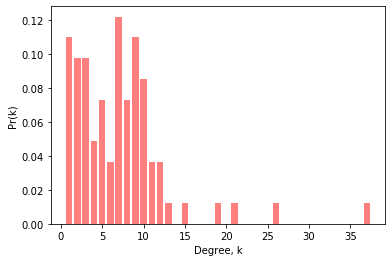

Semilogx (PDF)


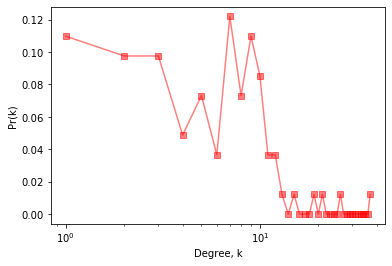

LogLog (PDF)


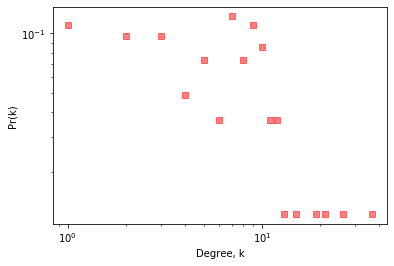

LogLog (CCDF)


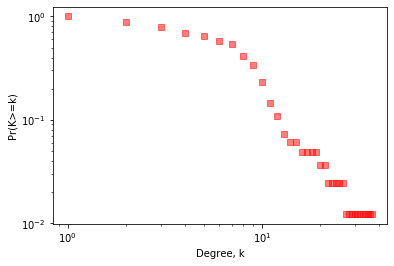

In [26]:
# Your code here

# printed the name of each plot and used different plots to demonstrate the degrees of all the nodes
print("Histogram")
plot_PDFhist(degrees)
print("Semilogx (PDF)")
plot_PDFsemi(degrees)
print("LogLog (PDF)")
plot_PDFloglog(degrees)
print("LogLog (CCDF)")
plot_CCDF(degrees)

The histogram under emphasizes the little amount of nodes with high degrees since the likelihood of a node with a smaller degree is much higher and is much more clearly represented.

The semilogx PDF distribution more clearly shows the nodes which have higher degrees and lower frequencies.

The LogLog PDF distribution over emphasizes the more frequent degrees as well as the more rare degrees.

The LogLog CCDF distribution represents our findings more clearly by smoothing out the data in the upper tail, so we are able to see that it slowly trails off to higher degrees at lower frequencies then dramatically drops when the nodes get higher degrees.

***
***
## Problem 2 : Graph properties (30 pts total)

Read each of the following written descriptions of a network data set. Then list in Markdown all applicable _graph properties_ that network has, from the following list.
* directed or undirected
* weighted or unweighted or signed
* bipartite
* temporal
* multiplex
* multigraph
* metadata

***
### Problem 2-A (5 pts)
A network of genes and the $k$-mers they contain, for some fixed choice of $k$ (e.g., $k=3$). Nodes are either the DNA sequence of a full gene or the sequence of a particular $k$-mer, and each gene is connected to all the $k$-mers it contains.

**Answer**: 

* directed: the gene nodes will be connected to the k-mers that it contains, but the k-mers do not contain the genes
* weighted: if there are no repeated k-mers, then a gene could contain more than one of each k-mer, so the weight could be the number of that k-mer it contains
* bipartite: genes would be connected to k-mers, but same size k-mers would not be able to contain other k-mers and genes cannot contain other genes
* multigraph: if it is not weighted, you can represent a gene containing multiple of one k-mer by how many edges it has

***
### Problem 2-B (5 pts)
A network of proteins and their pairwise interactions. Each node is a protein, and a pair of nodes $i,j$ are connected if protein $i$ binds to protein $j$ _in vivo_. Edges are annotated with the corresponding (real-valued) binding affinity, and nodes are annotated with their molecular weight.

**Answer**: 

* undirected: they are pairwise interactions so if protein A binds to protein B, then protein B binds to protein A
* weighted: the edges contain the corresponding binding affinity
* metadata: the nodes contain their molecular weight

***
### Problem 2-C (5 pts)
A sequence of network snapshots representing the spread over time of a communicable disease (e.g., influenza) through a human population. Every snapshot contains the same set of nodes, and the $t$-th snapshot contains all the edges that occurred in the real-time interval of $[t,t+1)$. Nodes are people, and two people $i,j$ are connected in the $t$-th snapshot if $j$ was infected by $i$ within the interval $[t,t+1)$. Nodes are annotated by the person's age and sex.

**Answer**: 

* directed: the direction represents who infected who
* unweighted: there is not any information about the edges
* temporal: the infection is happening over time; at each new time, new people may be infected
* metadata: the nodes contain the person's age and sex

***
### Problem 2-D (5 pts)
A gene regulatory network where nodes are genes, and an edge exists if gene $i$ regulates gene $j$, in two layers. Edges are annotated as being either an activation (layer 1) or an inhibition (layer 2) type of interaction. Genes are annotated by their [Gene Ontology](http://geneontology.org) (GO) functional class label.

**Answer**: 

* directed: if gene A activates or inhibits gene B, it is not necessarily true that B reciprocates
* unweighted: each layer contains what type of relationship the genes have
* multiplex: each layer would represent a different relationship between the genes
* metadata: the nodes contain their Gene Ontology class label

***
### Problem 2-E (5 pts)
A network of proteins in a signaling pathway. Each node is a protein, and a pair of nodes $i,j$ are connected if $i$ binds to $j$. Edges are annotated with the effect of the binding, either activation or inhibition.

**Answer**: 

* directed: if protein A activates/inhibits protein B, it is not necessarily true the protein B reciprocates
* signed: -1 would represent inhibition, +1 would represent activation

***
### Problem 2-F (5 pts)
A network of disease and gene associations, where nodes are either diseases or genes, and a disease $i$ and a gene $j$ are connected if $j$ is associated (in some way) with the incidence of $i$. Disease are annotated with various information about them, e.g., their name, treatment, symptoms list, etc., and genes are annotated with the DNA sequence.

**Answer**: 

* undirected: they are associated but we do not know which way they are associated
* unweighted: there are no details for the edges
* bipartite: genes associate with diseases, but diseases do not associate with other diseases and genes do not associate with genes
* metadata: the disease nodes contain their name, treatment, symptoms, etc. and the gene nodes contain their DNA sequence

***
***

## Problem 3 : Calculations by hand (25 pts total)

For each of the following networks, calculate by hand:
* maximum degree $k_{\rm max}$
* minimum degree $k_{\rm min}$
* clustering coefficient $C$ (transitivity)
* diameter $\ell_\max$

Do not use software to do these calculations. Explain each calculation and show your work in Markdown in the corresponding box below.

Hint: If a specific network is given, you may give your answers as numbers. If a family of networks is given (e.g., one in which the number of nodes $n$ is not specified), your answers should be in terms of the variables that parameterize the network (e.g., $n$).

***
### Problem 3-A (5 pts)
Let $G$ be a fully connected simple network, aka, a complete graph, with $n$ nodes.

$k_{max} = n - 1$ <br>
$k_{min} = n - 1$ <br>
In a complete graph, all nodes are connected to all other nodes, but they do not have self loops, so it would be connected to all $n$ nodes minus itself.

$C = \frac{2*(n_{v})}{k(k - 1)}$ <br>
This is the equation for calculating the clustering coefficient where $n_v$ is the number of edges between neighboring nodes; however, for complete graphs, the clustering coefficient is $1$.

$\ell_{max} = 1$ <br>
The diameter is the longest path of all of the shortest paths from all nodes to all other nodes. Since all nodes are connected in a complete graph, the longest path to get to any node from any node is $1$.

***
### Problem 3-B (10 pts)

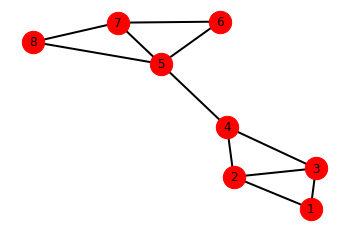

In [27]:
G = nx.Graph()          # empty graph data structure
# now, add a bunch of edges simultaneously
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,4), (4,5), (5,6), (5,7), (5,8), (6,7), (7,8)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

$k_{max} = 4$ <br>
Node $5$ has a degree of $4$.

$k_{min} = 2$ <br>
Several nodes have a degree of $2$.

$C_{1} = \frac{2*1}{2(2 - 1)} = 1$ <br>
$C_{2} = \frac{2*2}{3(3 - 1)} = \frac{2}{3}$ <br>
$C_{3} = \frac{2*2}{3(3 - 1)} = \frac{2}{3}$ <br>
$C_{4} = \frac{2*1}{3(3 - 1)} = \frac{1}{3}$ <br>
$C_{5} = \frac{2*2}{4(4 - 1)} = \frac{1}{3}$ <br>
$C_{6} = \frac{2*1}{2(2 - 1)} = 1$ <br>
$C_{7} = \frac{2*2}{3(3 - 1)} = \frac{2}{3}$ <br>
$C_{8} = \frac{2*1}{2(2 - 1)} = 1$ <br>
$C = 0.708$
I calculated the clustering coefficient for each node and averaged them.

$\ell_{max} = 4$ <br>
I looked at all of the shortest paths and chose the max of those.

***
### Problem 3-C (5 pts)
Let $G$ be a _perfect_ binary tree containing $n$ nodes. Hint: how many nodes $n$ does a perfect binary tree contain, for depth $d=0,1,2,\dots$

(*extra credit*) Calculate the mean degree $\langle k \rangle$.

$k_{max} = 3$ <br>
The max is if the node has a parent and two children

$k_{min} = 1$ <br>
The min is if the node is a leaf and only has a parent

$C = \frac{2*(n_{v})}{k(k - 1)}$ <br>
The clustering coefficient for each node would be $0$ making the average $C=0$ because it acts as a star shaped graph where no node has neighbors that have connections between those neighbors. This would make the numerator of the equation always $0$.

$\ell_{max} = 2\log(n)$ <br>
The longest path of all the shortests paths would be going from a leaf on one side all the way to the top and back to the bottom of the other side. This is $2$ times the height of the tree which is $\log(n)$.

***
### Problem 3-D (5 pts)
Let $G$ be a simple "ring" network with $n$ nodes, in which nodes are arranged in a line, each one connecting only to its immediate neighbors to the left and right, except for the nodes at the beginning and end of the line, which connect to each other. Below is an example for $n=6$, but state your answers for the general case of $n>0$.

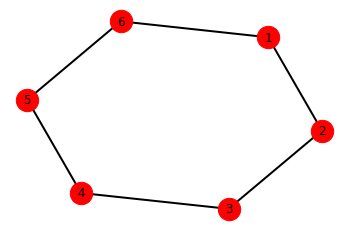

In [28]:
G = nx.Graph()          # empty graph data structur
G.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

$k_{max} = 2$ <br>
They are circular and only connected to the nodes on the left and the right.

$k_{min} = 2$ <br>
They will always be connected to the nodes on the left and the right

$C = 
    \begin{cases}
        1 & \text{if $n = 3$}\\
        0 & \text{if $n > 3$}\\
    \end{cases}
$
If $n = 3$, the graph is complete and as we know from $3A$ a complete graph has a $C = 1$. If $n > 3$, than each neighbor will have one other different neighbor, so the numerator of the coefficient equation will be $0$.

$\ell_{max} = \text{floor}(\frac{n}{2})$ <br>
If $n$ is even, you would have to go halfway around the circle as the longest shortest path. If $n$ is odd, you would need to go almost all the way around the circle, so you would take the floor of half of $n$.

***
***

## Problem 4 : Reading the literature (*10pts extra credit*)

Choose a paper from the [Supplemental Reading list on the external course webpage](http://tuvalu.santafe.edu/~aaronc/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

* *What paper did I read?*<br/>
A. Vazquez et al., **Modeling of protein interaction networks.** Complexus 1, 38-44 (2003).
<br/>
* *What was the research question?*<br/>
As genes diverge, will the network producing model react accordingly to how the proteins interact in biology? Can we model the network with the divergence of genes and their coded proteins?
<br/>
* *What was the approach the authors took to answer that question?*<br/>
In order to recreate the duplication and divergence of genes, they started with a network of two genes, or nodes. To represent duplication, at random and selectively, they select a node and copy it creating a new node with the same connections or edges. With some probability they create a link between the two nodes to represent self-interacting proteins. For divergence, they take all nodes connected to the original and duplicated node, and at a different probability they disconnect one of the connections.
<br/>
* *What did they do well?*<br/>
They did a very good job of explaining the duplication and divergence process. It was very clear on how the genes interact with each other and change themselves throughout their evolution. It was also very clear how they relate to their ancestors, yet they can end up with different functions.
<br/>
* *What could they have done better?*<br/>
They could have explained the equations a bit more about where each part of the equation came from, or just analyzed the averages in more detail. A lot of the math just included the equation and what the equation gives you as opposed to how you get to that conclusion of the equation.
<br/>

* *What extensions can you envision?*<br/>
A next step of this research could be to test this dynamic model or protein interactions in other biological systems. This paper specifically models the yeast PIN; however, other biological systems may have different protein interactions and reactions to duplication and divergence. It would be very interesting to see how other organisms react to this same process.